#Decaimento Radioativo

* PET – Física UFRN
* Petiano: Felipe Menescal Pinto de Medeiros
* Data: 19/08/2020

O objetivo deste projeto é desenvolver a teoria acerca dos processos dos decaímentos radioativos, analisando conceitualmente e, posteriormente, conferindo como podemos representar estes processos através de uma simulação simples usando Python.

Este problema foi proposto no livro Computational Physics (Mark Newman) no capítulo 10 (exemplo 10.1 e questões 10.2 e 10.4).

A radioatividade é a propriedade de determinados elementos químicos  emitirem partículas subatômicas ou ondas eletromagnéticas com finalidade de se tornarem energeticamente estáveis. O fenômeno da Radioatividade foi observado pela primeira vez em 1896 quando o francês Henri Becquerel estudava os efeitos da luz solar sobre materiais fosforescentes. O primeiro caso de radioatividade artificial foi observado pelo casal Joliot-Curie durante a irradiação do alumínio com partículas $\alpha$.

##INTRODUÇÃO TEÓRICA

Vamos dizer que começamos com 1000 átomos de certo elemento radioativo. Podemos escrever a função de átomos com o tempo por meio de

\begin{equation}
N(t) = N_0 2^{-t/\tau}
\end{equation}

Onde $N(t)$ é o número de átomos no tempo, $N_0$ é o número inicial de átomos e $\tau$ é o tempo de meia vida, uma constante característica para cada isótopo definido como o tempo necessário para que a quantidade de matéria radioativa caia pela metade.

A fração de átomos remanescente tem um dado tempo $t$ é dada por

\begin{equation}
N(t)/N_0 = 2^{-t/\tau}
\end{equation}

A probabilidade de um único átomo decair em um dado tempo $t$ é dada por

\begin{equation}
P(t) = 1-2^{-t/\tau}
\end{equation}

##EXEMPLO ADOTADO

Vamos considerar o isótopo radioativo $^{208}\mathrm{Tl}$ (tálio 208) que decai para o $^{208}\mathrm{Pb}$ (chumbo 208), que é estável. Vamos começar com 1000 átomos de tálio 208 com passos de tempo de 1 segundo. Vamos implementar cada passo de tempo checando a probabilidade do átomo de tálio decair.

##IMPORTANDO AS BIBLIOTECAS

In [ ]:
from pylab import plot,xlabel,ylabel,show,legend
from random import random
from numpy import arange

##DEFINIR CONSTANTES E PARÂMETROS

In [ ]:
NTl = 1000            #número de átomos de tálio 208
NPb = 0               #número de átomos de chumbo 208
tau = 3.053*60        #tempo de meia-vida do tálio 208 em segundos
h = 1.0               #passo de tempo (segundos)
p = 1 - 2**(-h/tau)   #probabilidade
tmax = 1000           #tempo total de simulação

##CRIANDO AS LISTAS

In [ ]:
tpoints = arange(0,tmax,h)
Tl = []
Pb = []

##CRIANDO O LOOP

In [ ]:
for t in tpoints:
    Tl.append(NTl)
    Pb.append(NPb)

    #cálculo dos átomos que decaem
    decay = 0
    for i in range(NTl):
        if random()<p:
            decay += 1
    NTl -= decay
    NPb += decay

A função "random()" gera um número real $x$ aleatório onde $0\leq x\leq1$.

##GERANDO O GRÁFICO

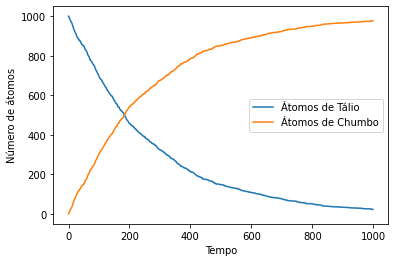

In [ ]:
plot(tpoints,Tl)
plot(tpoints,Pb)
legend(["Átomos de Tálio","Átomos de Chumbo"])
xlabel("Tempo")
ylabel("Número de átomos")
show()

Observamos que, no geral, vemos um decaimento exponencial porém é impossível não notar o aspecto ruidoso dos dados, que é resultado da natureza aleatória do método utilizado.

##NOVO PROBLEMA

Queremos agora trazer um exemplo um pouco mais complicado: a cadeia de decaimento.

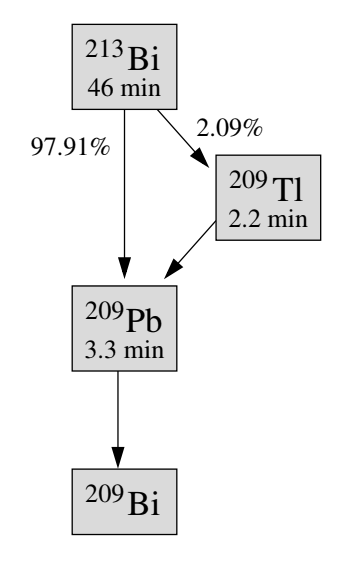

O isótopo $^{213}\mathrm{Bi}$ (bismuto 213) decai para o $^{209}\mathrm{Bi}$ (bismuto 209), que é estável, por duas diferentes rotas com suas respectivas probabilidades e tempos de meia vida, mostradas na figura acima.

**Nota:** na realidade, o $^{209}\mathrm{Bi}$ não é estável, mas seu tempo de meia vida é de $10^{19}$ anos, tempo que corresponde a um bilhão da idade no Universo, assim faz-se que ele seja, na prática, estável.

Vamos começar com 10.000 átomos de bismuto 213 com passo de tempo de 1 segundo com tempo total de 20.000 segundos.

##DEFINIR CONSTANTES E PARÂMETROS

**Nota:** o passo de tempo $h$ já foi definido anteriormente.

In [ ]:
NBi213 = 10000        #número de átomos de bismuto 213
NTl209 = 0            #número de átomos de tálio 209
NPb209 = 0            #número de átomos de chumbo 209
NBi209 = 0            #número de átomos de bismuto 209
tmax = 20000          #tempo total de simulação

##CRIANDO AS LISTAS

In [ ]:
tpoints = arange(0,tmax,h)
Bi213 = []
Tl209 = []
Pb209 = []
Bi209 = []

Perceba que não definimos a função de probabilidade de decaimento como fizemos anteriormente. Para facilitar o nosso código, vamos definir uma função de probabilidade que será função do tempo de meia vida (lembrando que temos de usar o tempo em segundos).

In [ ]:
mvBi = 46*60          #meia-vida Bi 213 em segundos
mvTl = 2.2*60         #meia-vida Tl 209 em segundos
mvPb = 3.3*60         #meia-vida Pb 209 em segundos

def P(tmv):           #função probabilidade-de-decaimento
    return 1 - 2**(-h/tmv)

**Nota:** o detalhe deste exemplo está no fato de que precisar criar o *loop* de baixo para cima uma vez que uma bifurcação no caminho de decaimente para evitar que o mesmo átomo decaia duas vezes num único passo de tempo.

In [ ]:
for t in tpoints:
    Bi213.append(NBi213)
    Tl209.append(NTl209)
    Pb209.append(NPb209)
    Bi209.append(NBi209)
    
    #decaimento de Pb 209
    
    decayPb = 0
    for i in range(NPb209):
        
        if random() < P(mvPb):
            decayPb += 1
        
    NPb209 -= decayPb
    NBi209 += decayPb
        
    #decaimento de Tl 209
        
    decayTl = 0
    for i in range(NTl209):
        if random() < P(mvTl):
            decayTl += 1
        
    NTl209 -= decayTl
    NPb209 += decayTl
        
    #decaimento de Bi 213
        
    decayBi = 0
    for i in range(NBi213):
        if random() < P(mvBi):
            decayBi += 1
    
    #probabilidade do Bi 213 decair para o Tl 209 ou Pb 209

    if random() < 2.09/100:
        NTl209 += decayBi
    else:
        NPb209 += decayBi
            
    NBi213 -= decayBi

##GERANDO O GRÁFICO

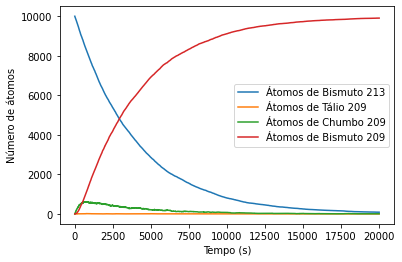

In [ ]:
plot(tpoints,Bi213)
plot(tpoints,Tl209)
plot(tpoints,Pb209)
plot(tpoints,Bi209)
legend(["Átomos de Bismuto 213","Átomos de Tálio 209","Átomos de Chumbo 209","Átomos de Bismuto 209"])
xlabel("Tempo (s)")
ylabel("Número de átomos")
show()

Observe que para haver crescimento do número de átomos de bismuto 209 temos que ter um crescimento do número de átomos de chumbo 209 ou tálio 209. Note também que vemos poucos átomos de tálio 209 (quase imperceptível no gráfico) pois ele tem apenas 2% de chance ocorrer e tem um tempo de vida 33% mais curto comparado ao do chumbo 209.

##CONCLUSÃO

Podemos fechar essa discussão acerca do decaimento radioativo usando simulação por estes dois exemplos mostrados, com uma cadeia mais simples e outra com uma bifurcação. Vemos como podemos recriar fenômenos que incluem processos aleatórios com uso do método utilizado.